# GG4527- Urban Analytics: A Toolkit for Sustainable Urban Development Assignment 1
## Lab 4: Python Recap
-----

### Challenge 1

### Challenge 2

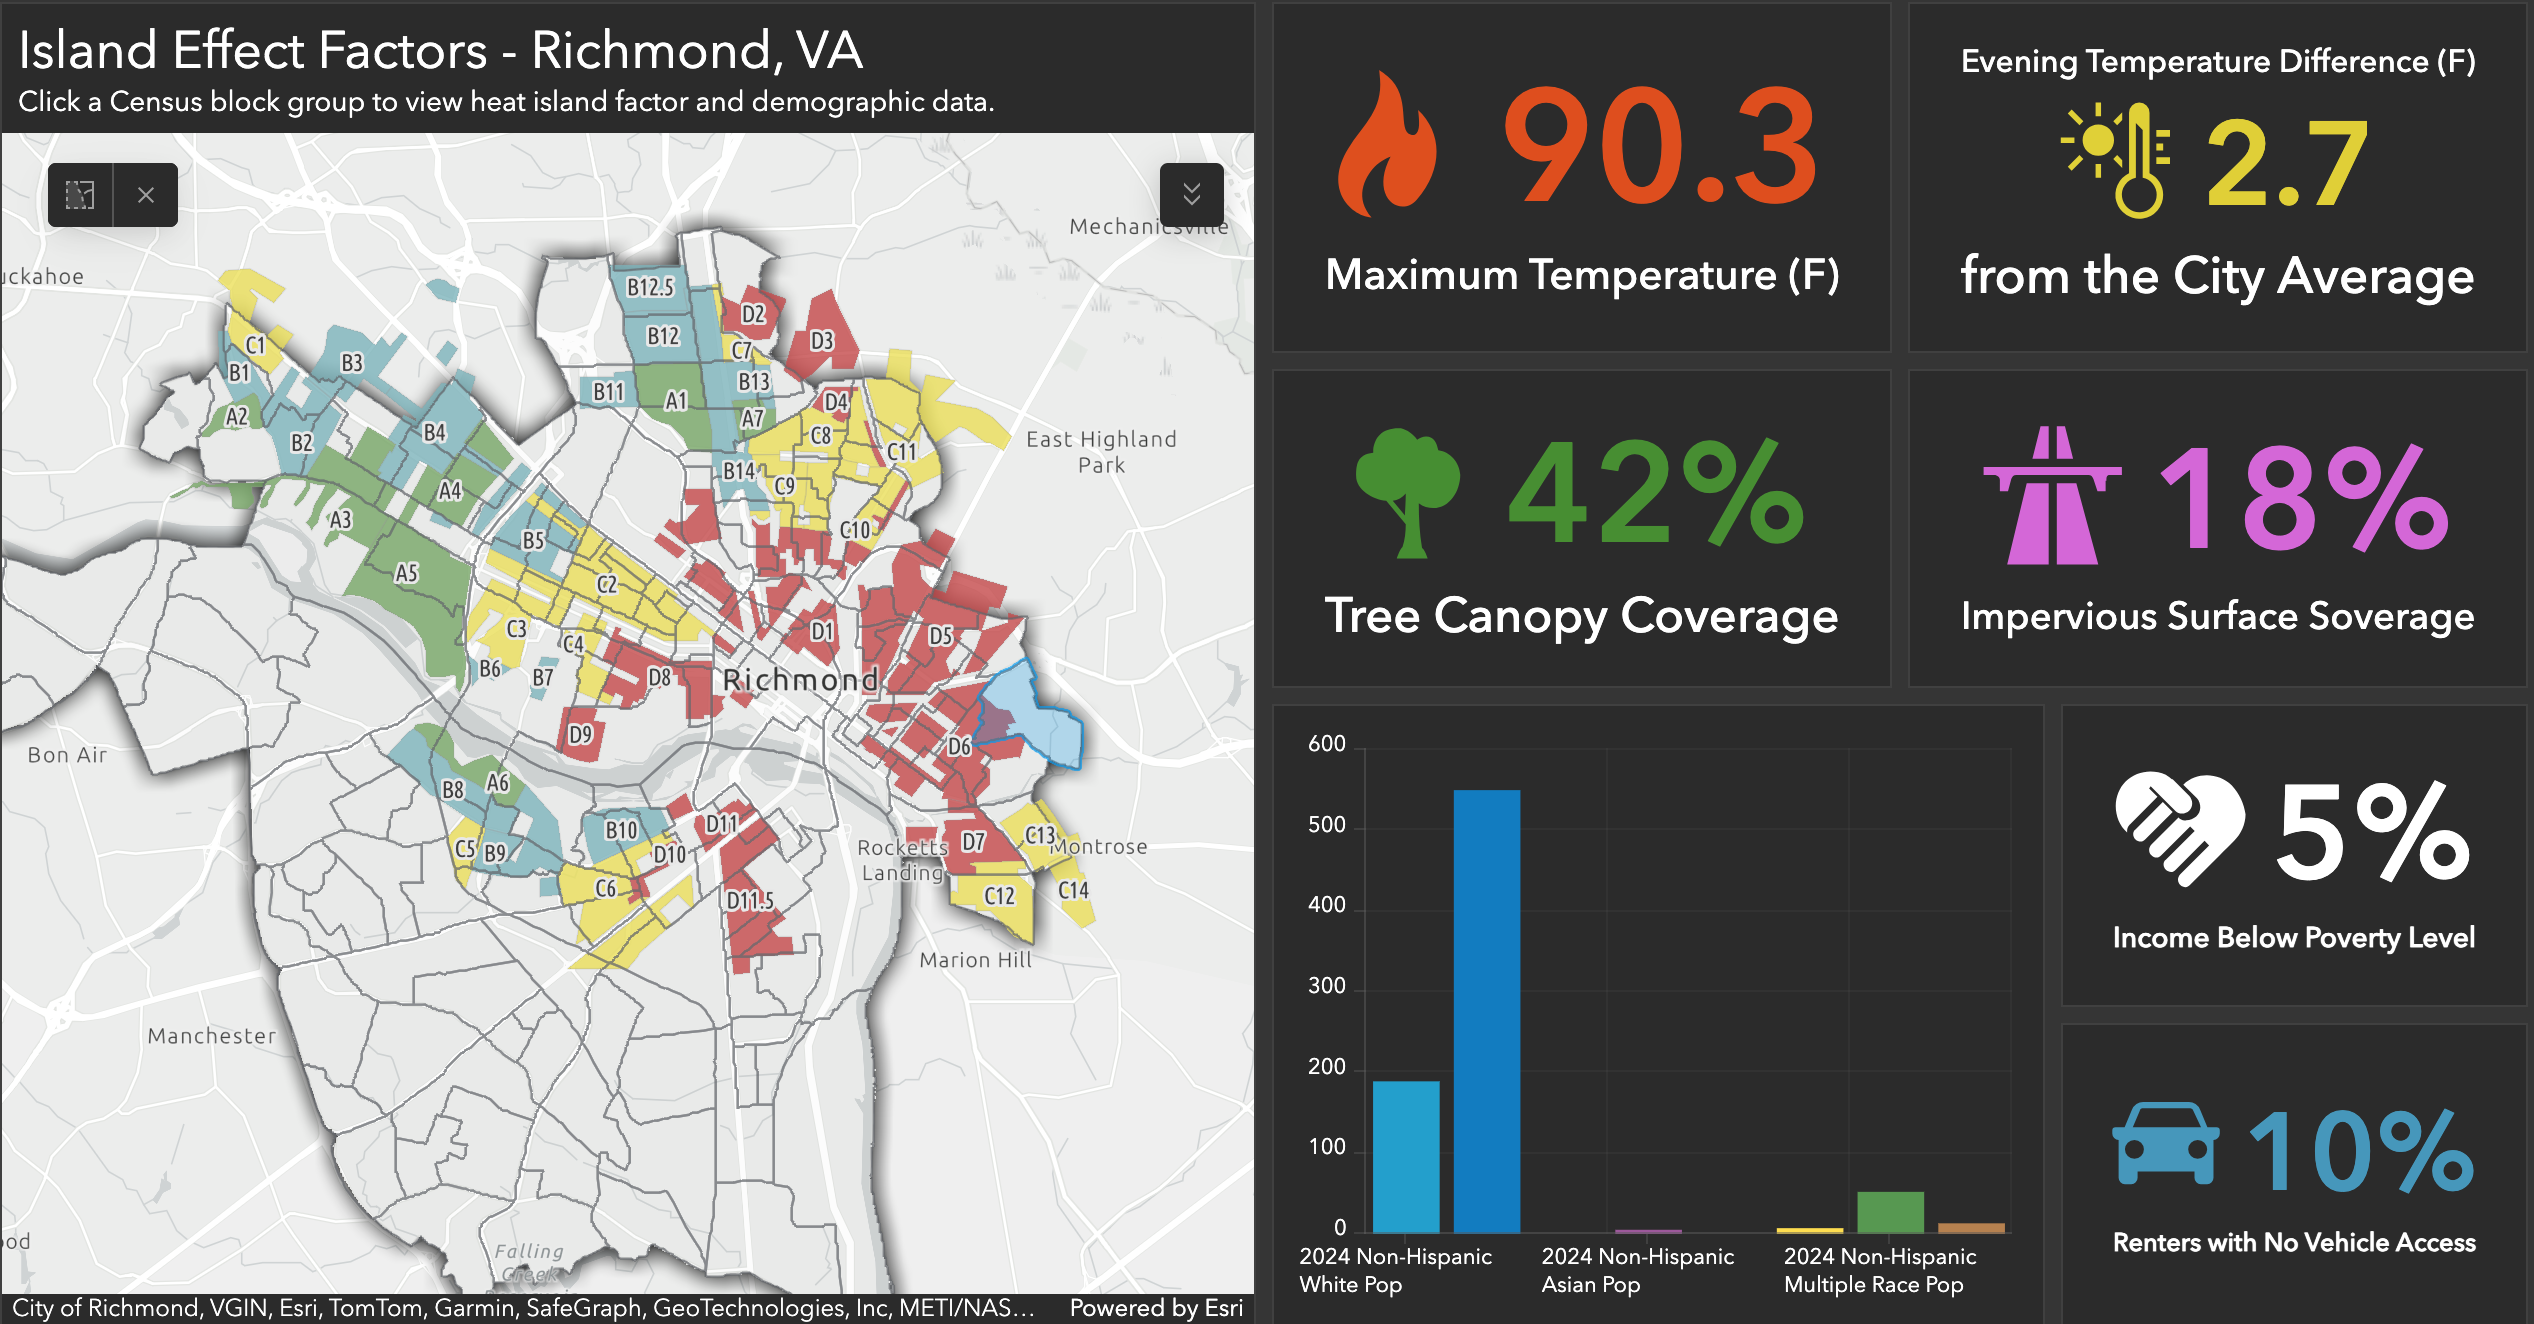

Link to dashboard:

https://www.arcgis.com/apps/dashboards/10f3560ade514e62b49f7b2a0937a082


### Challenge 3

In [5]:
import geopandas as gpd

scotland_sf = gpd.read_file("Lab_4_data_/SG_SIMD_2020.shp")
#this reads the shape file in which we can extract the data for Edinburgh


DriverError: Lab_4/data_lab_4/SG_SIMD_2020.shp: No such file or directory

In [ ]:
scotland_sf.head() # this tells us that the "LAName" column will indicate areas are for Edinburgh

In [ ]:
print(scotland_sf["LAName"].value_counts()) 

# this shows all of the area names the one of interest is "City of Edinburgh"
# it also tells us the there is 597 rows
# this is the information we need to extract in order to create maps

In [107]:
edi_sf= scotland_sf[scotland_sf["LAName"] == "City of Edinburgh"] # extracting wanted data


edi_sf.head() # shows the wanted data


DataZone                               DZName             LAName  \
1911  S01008417  Balerno and Bonnington Village - 01  City of Edinburgh   
1912  S01008418  Balerno and Bonnington Village - 02  City of Edinburgh   
1913  S01008419  Balerno and Bonnington Village - 03  City of Edinburgh   
1914  S01008420  Balerno and Bonnington Village - 04  City of Edinburgh   
1915  S01008421  Balerno and Bonnington Village - 05  City of Edinburgh   

      SAPE2017  WAPE2017  Rankv2  Quintilev2  Decilev2  Vigintilv2  Percentv2  \
1911       708       397    5537           4         8          16         80   
1912       691       378    6119           5         9          18         88   
1913       541       338    5200           4         8          15         75   
1914       466       274    6431           5        10          19         93   
1915       884       537    3441           3         5          10         50   

      ... CrimeRate  CrimeRank  HouseNumOC HouseNumNC  HouseOCrat  HouseNCrat  \
1911  ...        86     5392.0          17          8          2%          1%   
1912  ...       103     5063.0           7         10          1%          1%   
1913  ...       187     3594.0          30          0          6%          0%   
1914  ...       109     4957.0           2          0          0%          0%   
1915  ...       264     2575.0          61          6          7%          1%   

      HouseRank    Shape_Leng    Shape_Area  \
1911     6350.0  20191.721420  1.029993e+07   
1912     6650.0  25944.861787  2.357050e+07   
1913     5372.5   5738.935106  1.366457e+06   
1914     6957.0   1890.096713  1.051967e+05   
1915     4598.0   2645.609037  1.465441e+05   

                                               geometry  
1911  POLYGON ((315157.369 666212.846, 315173.727 66...  
1912  POLYGON ((317816.000 666579.000, 318243.000 66...  
1913  POLYGON ((316831.000 667049.000, 316816.000 66...  
1914  POLYGON ((316368.000 666124.000, 316379.297 66...  
1915  POLYGON ((316411.427 666596.771, 316422.940 66...  

[5 rows x 52 columns]

In [4]:
import geopandas as gpd
basic_edi = edi_sf.explore()
basic_edi

#creating a basic map to ensure the correct data has been extracted

NameError: name 'edi_sf' is not defined

In [ ]:
import matplotlib.pyplot as plt
import mapclassify


fig, ax = plt.subplots(figsize=(8, 6)) #setting ax values

classifier_nb = mapclassify.NaturalBreaks(edi_sf['CrimeRate'], k=5) #setting natural breaks intervals

# I have set this as classifier_nb to ensure there is no mix up between the two maps and indicate 
# the position the maps when viewed together


edi_sf.plot(column='CrimeRate', ax=ax,
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins} 
        )
plt.title("Choropleth Map of Ediburgh Showing Crime Rates using Natural Breaks") #setting title 
plt.show()

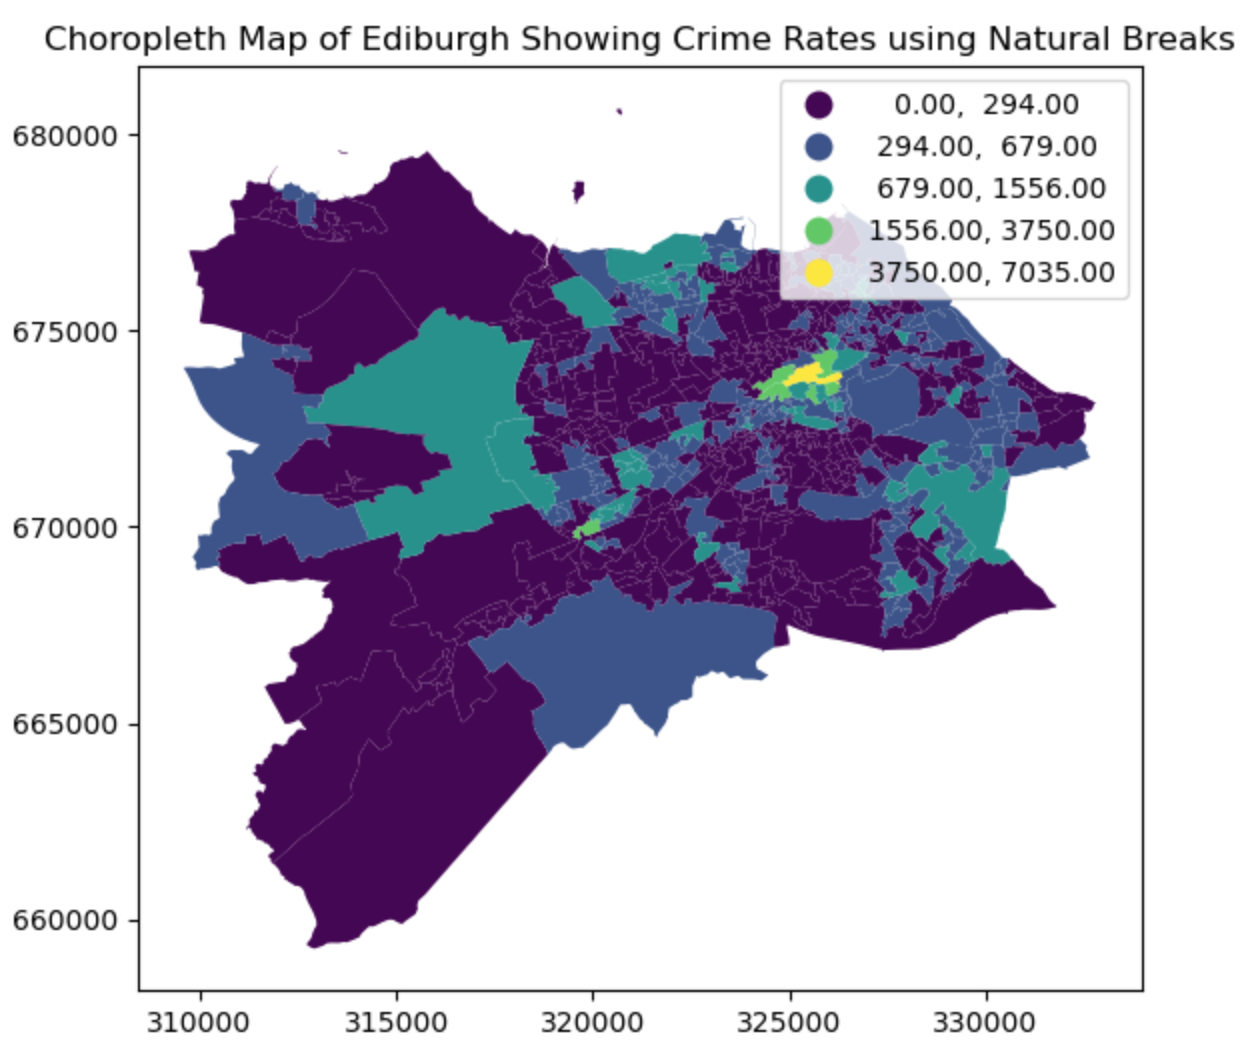

In [72]:
# Screenshot of results

from IPython.display import Image

Image(filename='Lab_4/ss/edi_nb.png')


In [ ]:
import matplotlib.pyplot as plt
import mapclassify


fig, ax = plt.subplots(figsize=(8, 6)) #setting ax values for size of map

classifier_ei = mapclassify.EqualInterval(edi_sf['CrimeRate'], k=5) #setting equal intervals

# again, ensuring the classifier name is different to the last map i.e classifier_ei this time

edi_sf.plot(column='CrimeRate', ax=ax,
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_ei.bins} 
        )
plt.title("Choropleth Map of Ediburgh Showing Crime Rates using Equal Intervals") # setting title
plt.show()

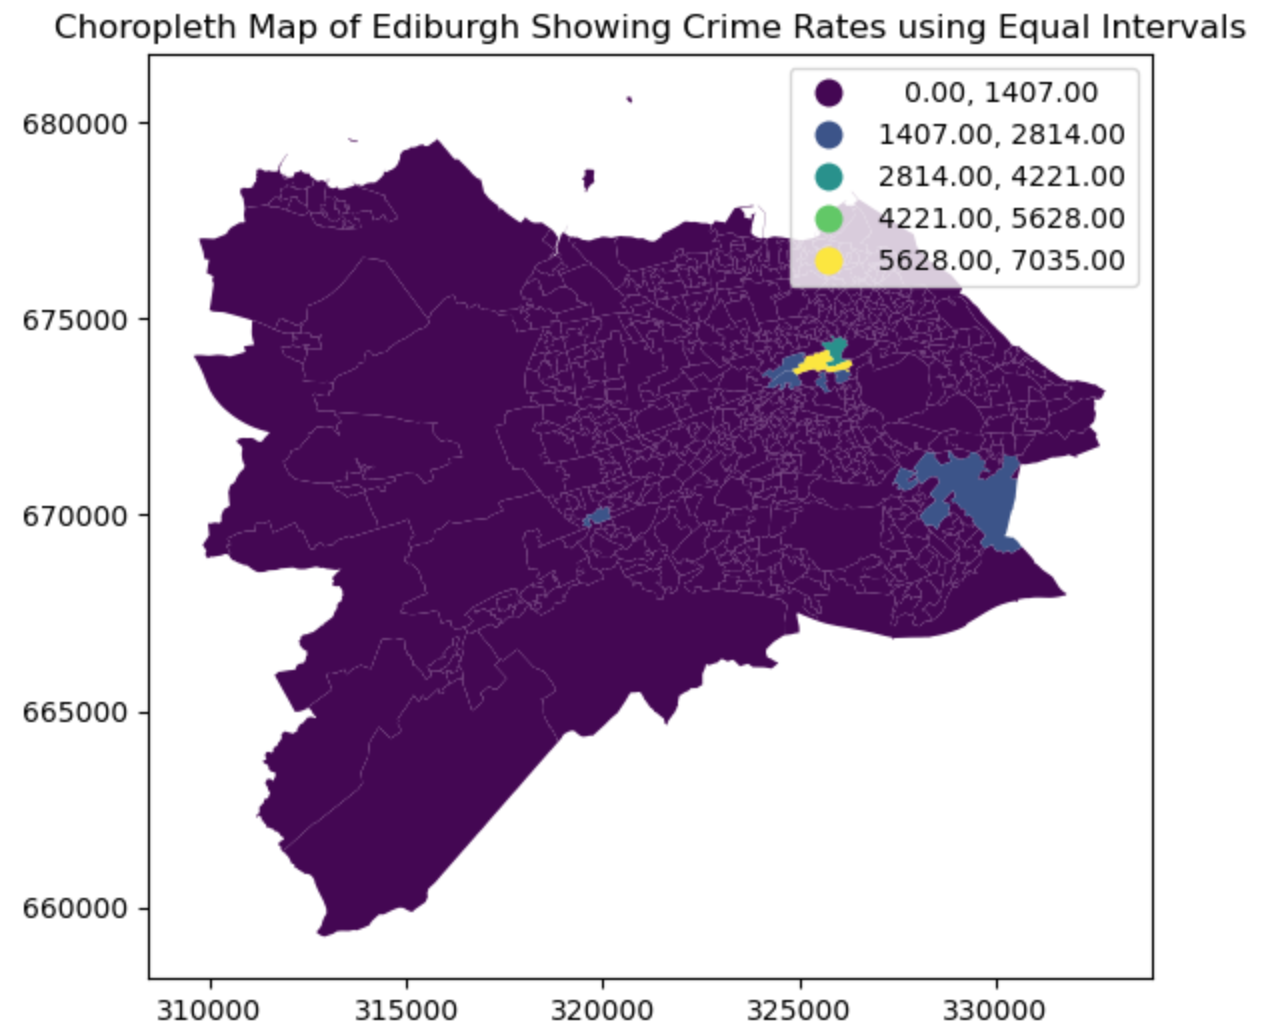

In [73]:
# screenshot of results

from IPython.display import Image

Image(filename='Lab_4/ss/edi_ei.png')

In [ ]:
import matplotlib.pyplot as plt
import mapclassify

fig, axs = plt.subplots(1, 2, figsize=(18, 8)) # setting up environment to view maps side by side


edi_sf.plot(column='CrimeRate', ax=axs[0],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins} #using classifier_nb for first map
        )
axs[0].set_title("Choropleth Map of Ediburgh Showing Crime Rates using Natural Breaks")

edi_sf.plot(column='CrimeRate', ax=axs[1],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_ei.bins} #using classifier_ei for second map
        )
axs[1].set_title("Choropleth Map of Ediburgh Showing Crime Rates using Equal Intervals")

plt.tight_layout() 
plt.show()


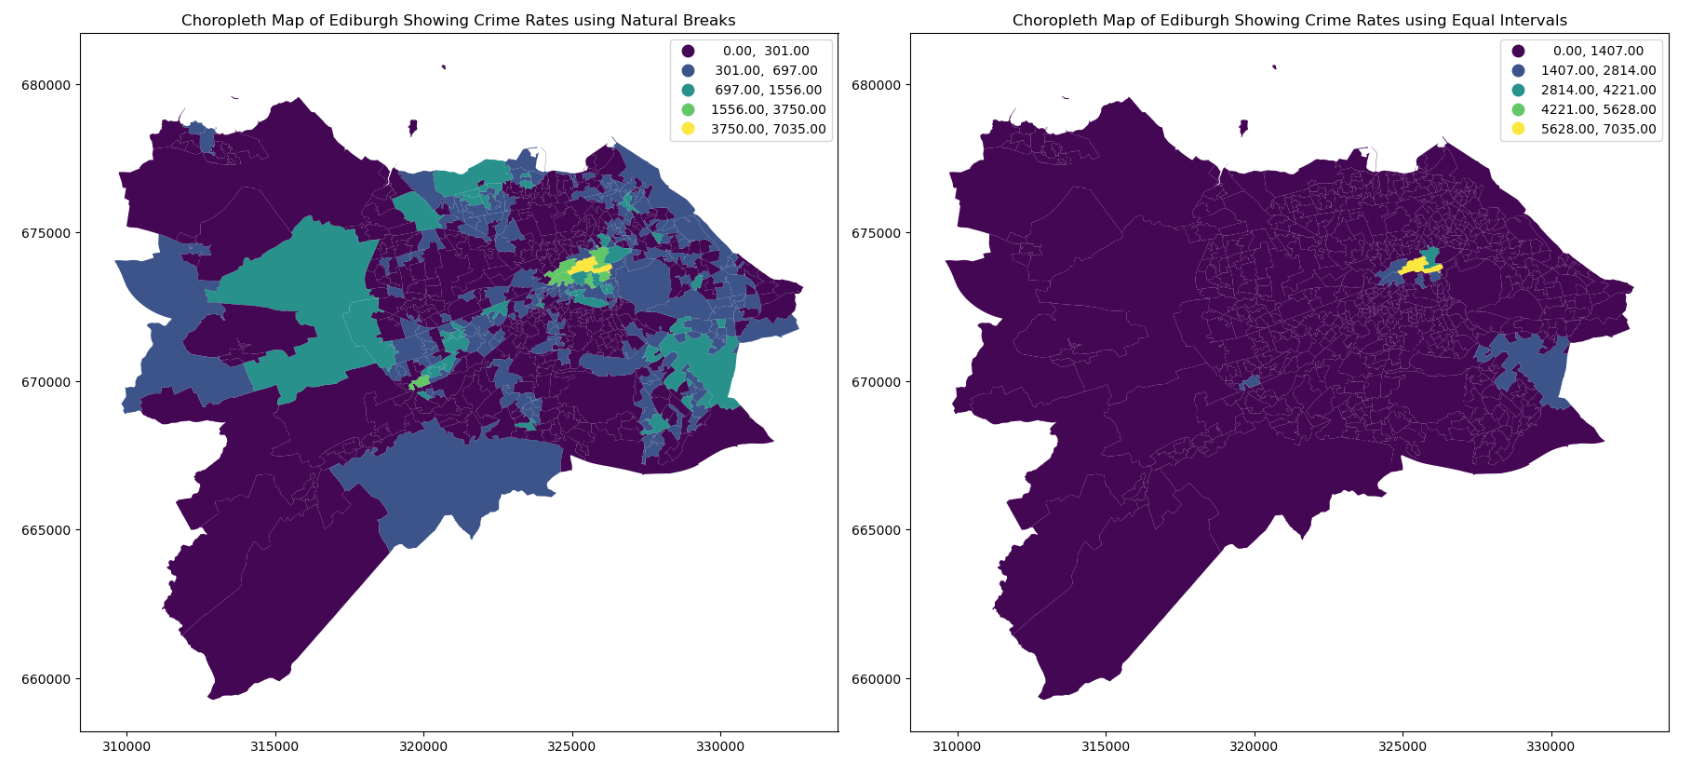

In [74]:
# Screenshot of results

from IPython.display import Image

Image(filename='Lab_4/ss/edi_both.png')

In [ ]:
#for plotting histograms to compare breaks in the data

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # setting up environment to view histograms side by side


sns.histplot(data=edi_sf, x="CrimeRate", ax=axes[0], kde=True, bins=20)
axes[0].axvline(classifier_nb.bins[0], color='red', linestyle='dashed', linewidth=2, label='Natural Breaks')
for bin_value in classifier_nb.bins:
    axes[0].axvline(bin_value, color='red', linestyle='dashed', linewidth=2) # ensuring to use classifer_nb
axes[0].set_title("Crime Rate Histogram with Natural Breaks")
axes[0].legend()


sns.histplot(data=edi_sf, x="CrimeRate", ax=axes[1], kde=True, bins=20)
axes[1].axvline(classifier_ei.bins[0], color='blue', linestyle='dashed', linewidth=2, label='Equal Intervals')
for bin_value in classifier_ei.bins:
    axes[1].axvline(bin_value, color='blue', linestyle='dashed', linewidth=2) # ensuring to use classifier_ei
axes[1].set_title("Crime Rate Histogram with Equal Intervals")
axes[1].legend()

# 4. Adjust the plot.
plt.tight_layout()
plt.show()

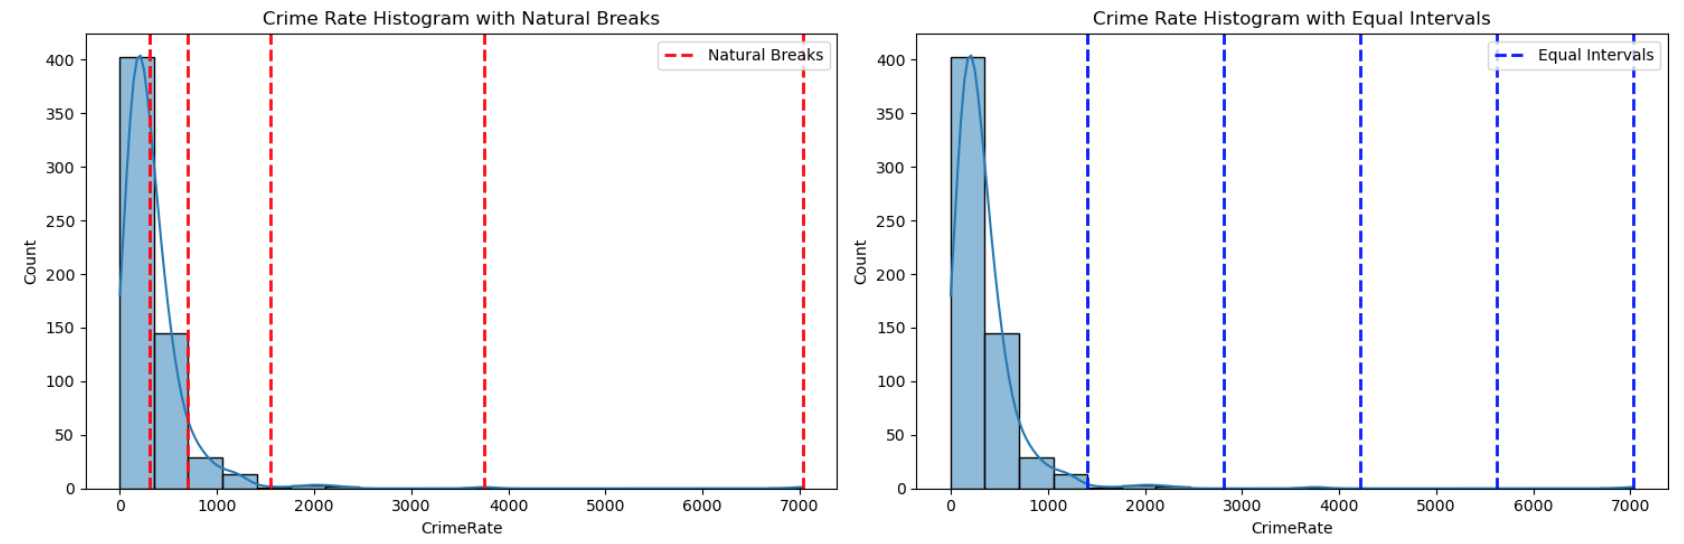

In [75]:
#Screenshot of results

from IPython.display import Image

Image(filename='Lab_4/ss/edi_histo.png')

In [3]:
# creating maps to compare Glasgow and Edinburgh deprivation

import mapclassify as mc

# Edinburgh first
num_classes = 5
classifier_nb = mc.NaturalBreaks(edi_sf['CrimeCount'], k=num_classes)  
edi_sf['classification_nb'] = classifier_nb.yb 

print(classifier_nb)
print(edi_sf[['CrimeCount', 'classification_nb']]) # using crimecount as a measure of deprivation

# classification looks good so can create interactive map

NameError: name 'edi_sf' is not defined

In [1]:
import plotly.express as px

edi_dep = px.choropleth_mapbox(edi_sf,
                           geojson=edi_sf.geometry,
                           locations=edi_sf.index,
                           color="classification_nb",
                           color_continuous_scale="viridis",
                           range_color= (0, 5),
                           opacity=0.5,
                           center={"lat": 55.9533, "lon": -3.1883},
                           mapbox_style="carto-positron",
                           zoom=9.5)
edi_dep.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
edi_dep.show()

NameError: name 'edi_sf' is not defined

Again, the data for this map has not been projected. I have ensured that the data is correctly stored and have tried to make sure that the classification works properly which seems fine. However, the issue arises when I try to make the interactive map as doesn't project the data. In addition to this I also attempted to use different attributes such as drug related deaths and education level with no qualifications but I still recieved no data on the map.

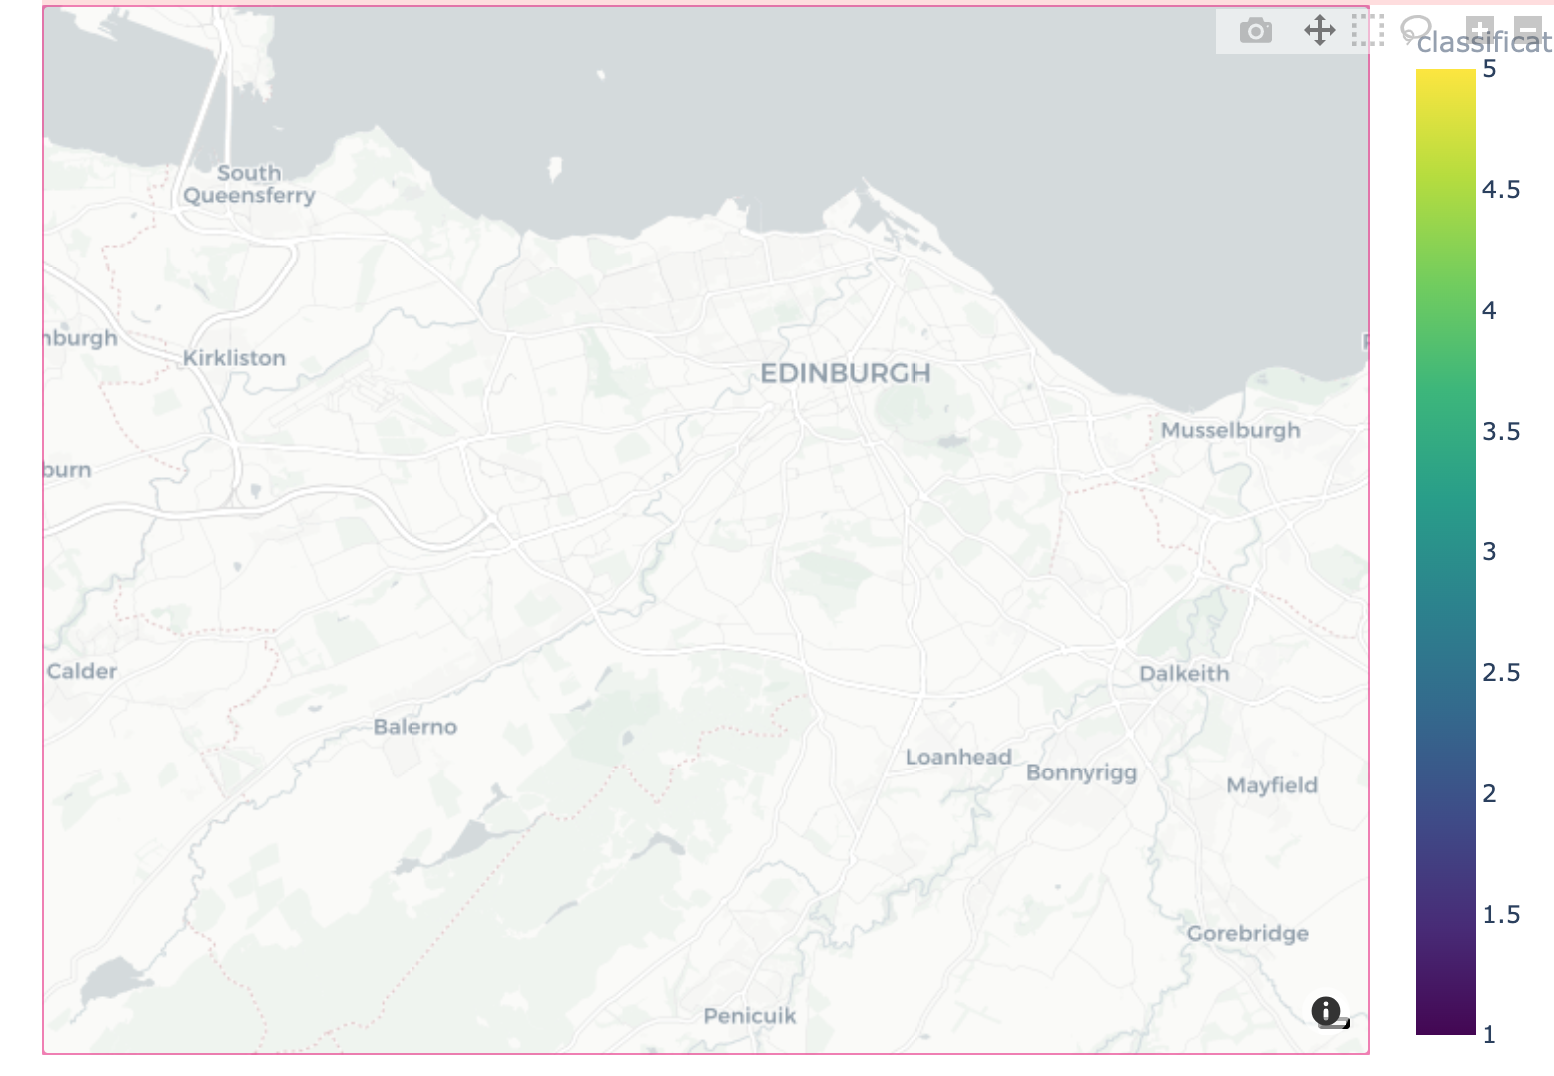

In [7]:
# Glasgow next

shapefile_path = 'data_lab4/SIMD_2020_GlasgowCity.shp'
gdf = gpd.read_file(shapefile_path) # reading in data for glasgow

num_classes = 5
classifier_nb = mc.NaturalBreaks(gdf['CrimeCount'], k=num_classes)  
gdf['classification_nb'] = classifier_nb.yb 

print(classifier_nb)
print(gdf[['CrimeCount', 'classification_nb']]) # using crimecount as a measure of deprivation

# classification looks good so can create interactive map

NameError: name 'gdf' is not defined

In [ ]:
import plotly.express as px

gla_dep = px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           color="classification_nb",
                           color_continuous_scale="viridis",
                           range_color= (0, 5),
                           opacity=0.5,
                           center={"lat": 55.9533, "lon": -3.1883},
                           mapbox_style="carto-positron",
                           zoom=9.5)
gla_dep.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
gla_dep.show()

Screenshot of Glasgow

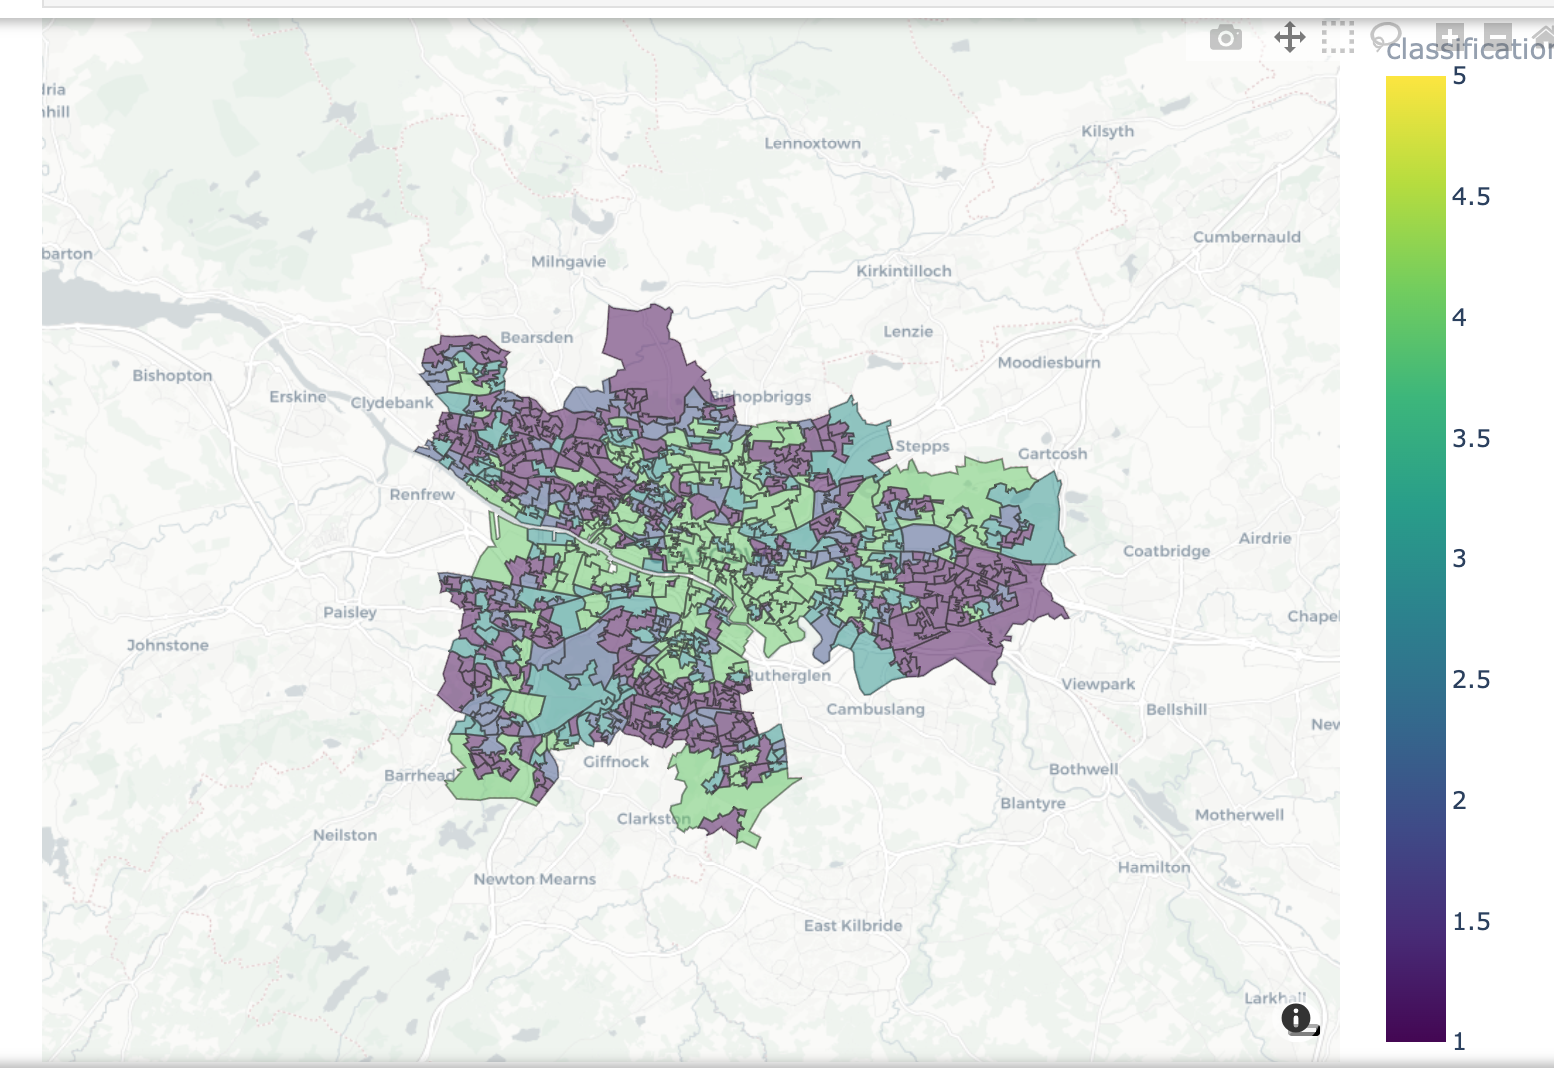

## Final Remarks

On the whole I am somewhat dissapointed with my results from the labs. Although I managed to resolve any errors that cropped up I was unable to get some of the data projected onto some of the maps. I assumed it would be a simple fix but after trying numerous different options there were still a few maps that I wasn't able to complete. 